In [1]:
#Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.(6.1.5)
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [6]:
import requests
requests.__version__

'2.26.0'

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=975ffdad65e7a63bedc91250a78d958c


In [14]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

# Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

# Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

# Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
# Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
# Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
# Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
# Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | storslett
Processing Record 2 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 3 of Set 1 | verkhnetulomskiy
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | baia-sprie
City not found. Skipping...
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | safaqis
City not found. Skipping...
Processing Record 9 of Set 1 | padang
Processing Record 10 of Set 1 | kawalu
Processing Record 11 of Set 1 | bandarbeyla
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | codrington
Processing Record 14 of Set 1 | neryungri
Processing Record 15 of Set 1 | tomatlan
Processing Record 16 of Set 1 | cidreira
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | calvinia
Processing Record 20

Processing Record 36 of Set 4 | kozhva
Processing Record 37 of Set 4 | pevek
Processing Record 38 of Set 4 | severo-kurilsk
Processing Record 39 of Set 4 | mizdah
Processing Record 40 of Set 4 | tiksi
Processing Record 41 of Set 4 | roald
Processing Record 42 of Set 4 | kampong thum
Processing Record 43 of Set 4 | laguna
Processing Record 44 of Set 4 | andenes
Processing Record 45 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 46 of Set 4 | nanortalik
Processing Record 47 of Set 4 | charters towers
Processing Record 48 of Set 4 | hamilton
Processing Record 49 of Set 4 | shelburne
Processing Record 50 of Set 4 | verkhnyaya toyma
Processing Record 1 of Set 5 | rawlins
Processing Record 2 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 3 of Set 5 | havoysund
Processing Record 4 of Set 5 | derbent
Processing Record 5 of Set 5 | krutinka
Processing Record 6 of Set 5 | portland
Processing Record 7 of Set 5 | svetlaya
Processing Record 8 of Set 5 | oka

Processing Record 26 of Set 8 | pandan
Processing Record 27 of Set 8 | chokurdakh
Processing Record 28 of Set 8 | lazaro cardenas
Processing Record 29 of Set 8 | markova
Processing Record 30 of Set 8 | westport
Processing Record 31 of Set 8 | nurpur
Processing Record 32 of Set 8 | peniche
Processing Record 33 of Set 8 | banda aceh
Processing Record 34 of Set 8 | shahreza
Processing Record 35 of Set 8 | winnemucca
Processing Record 36 of Set 8 | grand centre
City not found. Skipping...
Processing Record 37 of Set 8 | port hedland
Processing Record 38 of Set 8 | haibowan
City not found. Skipping...
Processing Record 39 of Set 8 | dalby
Processing Record 40 of Set 8 | kamenka
Processing Record 41 of Set 8 | talcahuano
Processing Record 42 of Set 8 | harper
Processing Record 43 of Set 8 | lincoln
Processing Record 44 of Set 8 | senneterre
Processing Record 45 of Set 8 | half moon bay
Processing Record 46 of Set 8 | yaan
Processing Record 47 of Set 8 | myitkyina
Processing Record 48 of Set 

Processing Record 10 of Set 12 | saquarema
Processing Record 11 of Set 12 | nedjo
Processing Record 12 of Set 12 | kargasok
Processing Record 13 of Set 12 | aksu
Processing Record 14 of Set 12 | usinsk
Processing Record 15 of Set 12 | saurimo
Processing Record 16 of Set 12 | kargopol
Processing Record 17 of Set 12 | banjar
Processing Record 18 of Set 12 | plettenberg bay
Processing Record 19 of Set 12 | saint-francois
Processing Record 20 of Set 12 | seoul
Processing Record 21 of Set 12 | carora
Processing Record 22 of Set 12 | wardha
Processing Record 23 of Set 12 | mayumba
Processing Record 24 of Set 12 | pizarro
Processing Record 25 of Set 12 | matamoros
Processing Record 26 of Set 12 | turukhansk
Processing Record 27 of Set 12 | maniitsoq
Processing Record 28 of Set 12 | soyo
Processing Record 29 of Set 12 | pringsewu
Processing Record 30 of Set 12 | cananeia
Processing Record 31 of Set 12 | barcelos
Processing Record 32 of Set 12 | chunskiy
Processing Record 33 of Set 12 | yazoo c

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Storslett,69.7678,21.0247,35.60,60,100,6.91,NO,2022-04-14 18:45:59
1,Verkhnetulomskiy,68.6073,31.7962,30.33,97,82,1.45,RU,2022-04-14 18:45:59
2,Kapaa,22.0752,-159.3190,77.11,78,40,11.50,US,2022-04-14 18:45:59
3,Rikitea,-23.1203,-134.9692,77.85,69,7,18.81,PF,2022-04-14 18:46:00
4,Mar Del Plata,-38.0023,-57.5575,62.62,69,0,12.66,AR,2022-04-14 18:46:00
5,Padang,-0.9492,100.3543,78.17,86,100,1.74,ID,2022-04-14 18:46:01
6,Kawalu,-7.3817,108.2082,72.12,96,90,2.26,ID,2022-04-14 18:46:01
7,Bandarbeyla,9.4942,50.8122,81.57,80,45,7.02,SO,2022-04-14 18:46:01
8,Punta Arenas,-53.1500,-70.9167,57.31,54,40,25.32,CL,2022-04-14 18:45:20
9,Codrington,-38.2667,141.9667,59.05,52,100,5.88,AU,2022-04-14 18:46:01


In [17]:
#Reorder columns
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]
new_column_order

['City',
 'Country',
 'Date',
 'Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed']

In [19]:
city_data_df = pd.DataFrame(city_data)[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Storslett,NO,2022-04-14 18:45:59,69.7678,21.0247,35.60,60,100,6.91
1,Verkhnetulomskiy,RU,2022-04-14 18:45:59,68.6073,31.7962,30.33,97,82,1.45
2,Kapaa,US,2022-04-14 18:45:59,22.0752,-159.3190,77.11,78,40,11.50
3,Rikitea,PF,2022-04-14 18:46:00,-23.1203,-134.9692,77.85,69,7,18.81
4,Mar Del Plata,AR,2022-04-14 18:46:00,-38.0023,-57.5575,62.62,69,0,12.66
5,Padang,ID,2022-04-14 18:46:01,-0.9492,100.3543,78.17,86,100,1.74
6,Kawalu,ID,2022-04-14 18:46:01,-7.3817,108.2082,72.12,96,90,2.26
7,Bandarbeyla,SO,2022-04-14 18:46:01,9.4942,50.8122,81.57,80,45,7.02
8,Punta Arenas,CL,2022-04-14 18:45:20,-53.1500,-70.9167,57.31,54,40,25.32
9,Codrington,AU,2022-04-14 18:46:01,-38.2667,141.9667,59.05,52,100,5.88


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")
#The last line in the code block will export the DataFrame to a CSV file, with the in

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

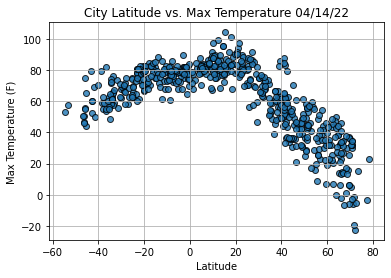

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

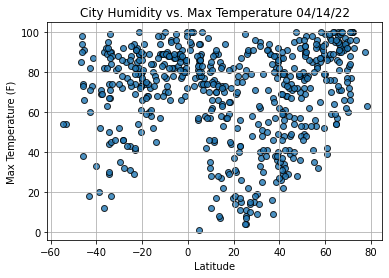

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Humidity vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

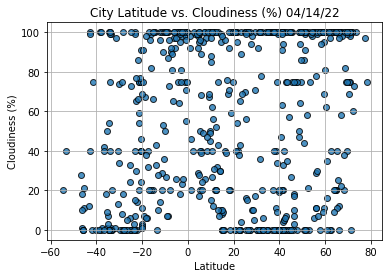

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

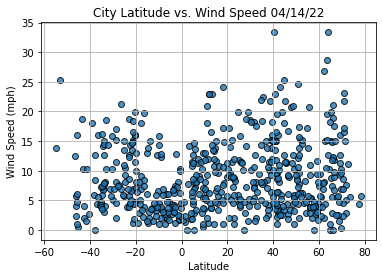

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [27]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [28]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [29]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

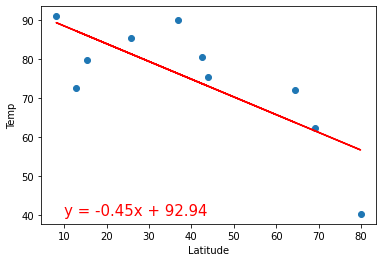

In [30]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [31]:
index13=city_data_df.loc[13]
index13

City               Port Elizabeth
Country                        ZA
Date          2022-04-14 18:41:15
Lat                       -33.918
Lng                       25.5701
Max Temp                    63.32
Humidity                       99
Cloudiness                     75
Wind Speed                  14.97
Name: 13, dtype: object

In [32]:
city_data_df["Lat"] >=0

0       True
1       True
2       True
3      False
4      False
       ...  
569     True
570     True
571     True
572     True
573     True
Name: Lat, Length: 574, dtype: bool

In [33]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Storslett,NO,2022-04-14 18:45:59,69.7678,21.0247,35.60,60,100,6.91
1,Verkhnetulomskiy,RU,2022-04-14 18:45:59,68.6073,31.7962,30.33,97,82,1.45
2,Kapaa,US,2022-04-14 18:45:59,22.0752,-159.3190,77.11,78,40,11.50
7,Bandarbeyla,SO,2022-04-14 18:46:01,9.4942,50.8122,81.57,80,45,7.02
10,Neryungri,RU,2022-04-14 18:46:02,56.6709,124.6491,22.82,93,100,5.32


In [34]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [35]:
#create values for x & y  
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

In [62]:
1. #Import linregress (6.4.2)
from scipy.stats import linregress

In [64]:
#2. Define/Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

In [65]:
#3. Run regression on hemisphere weather data.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

In [69]:
#4 Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

In [70]:
#5 Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

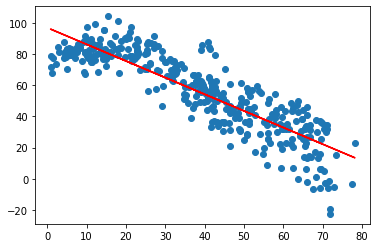

In [71]:
#6. Create a scatter plot and plot the regression line.
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")

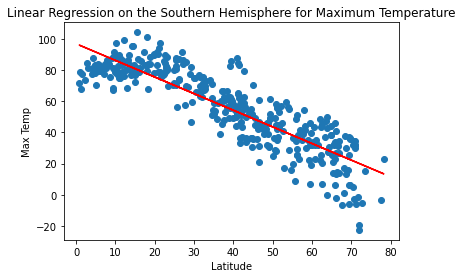

In [79]:
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-40,70))

In [78]:
#7. Annotate the text for the line equation.
plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel(y_label)
plt.show()

NameError: name 'text_coordinates' is not defined

In [83]:
#create values for x & y  
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

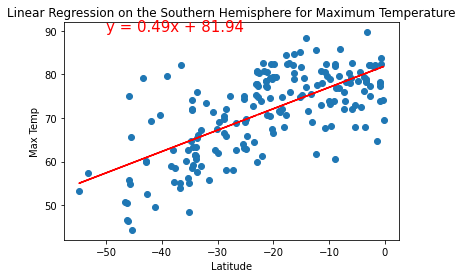

In [82]:
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

In [84]:
lingress(x_values,y_values)

NameError: name 'lingress' is not defined

In [85]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [86]:
#create values for x & y  
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

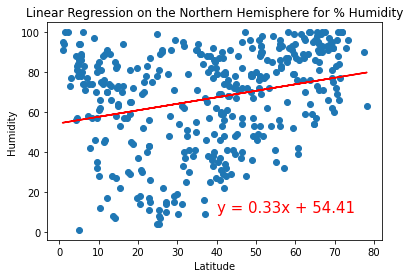

In [89]:
# Call the function(6.4.3)
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', 'Humidity',(40,10))


In [93]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

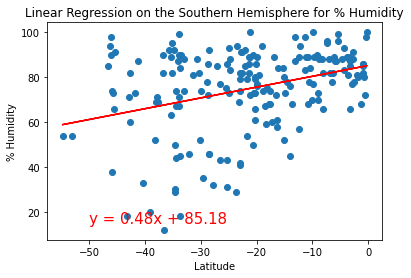

In [96]:
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))


In [97]:
#create values for x & y  
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

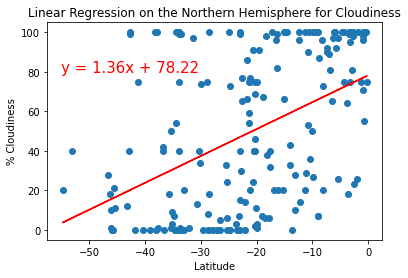

In [110]:
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Cloudiness', '% Cloudiness',(-55,80))

In [111]:
#create values for x & y  
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

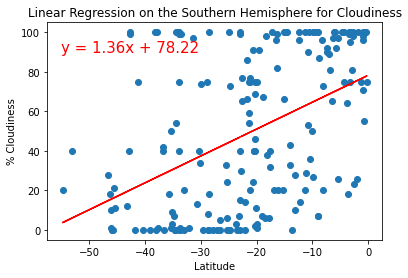

In [112]:
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Cloudiness', '% Cloudiness',(-55,90))

In [114]:
#create values for x & y  
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

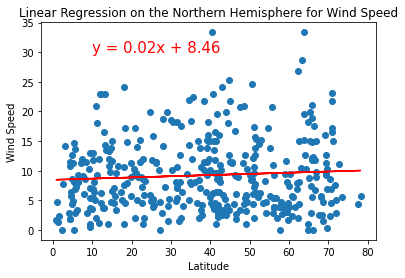

In [116]:
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(10,30))

In [118]:
#create values for x & y  
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

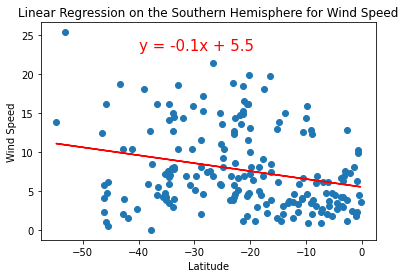

In [121]:
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-40,23))